In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import Birch,KMeans
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("in_dataset3.csv")
df['Dates']  = pd.to_datetime(df['Dates'])
print(df.shape)
df.head(2)

(443, 23)


,Dates,NAPMPMI Index,NAPMPMI_percent_change,USTBTOT Index,USTBTOT_percent_change,ADP CHNG Index,ADP_CHNG_percent_change,Initial Jobless Claims,Jobless_Percent_Change,Non Farm Payroll,...,University of Michigan Confidence,Confidence_Percent_Change,GDP QOQ Index,GDP_Percent_Change,CPDR9AFC Index,NYRPROWT Index,FEDL01 Index,CPDR9AFC_Percent_Change,NYRPROWT_Percent_Change,FEDL01_percent_change
0,1983-02-28,54.4,NaN,NaN,NaN,NaN,NaN,481,NaN,-73,...,74.6,NaN,NaN,NaN,NaN,NaN,8.51,NaN,NaN,NaN
1,1983-03-31,53.9,-0.009191,NaN,#VALUE!,NaN,#VALUE!,481,0.0,173,...,80.8,0.08311,5.4,NaN,NaN,NaN,8.77,#VALUE!,#VALUE!,0.030552


In [3]:
df.columns

Index(['Dates', 'NAPMPMI Index', 'NAPMPMI_percent_change', 'USTBTOT Index',
       'USTBTOT_percent_change', 'ADP CHNG Index', 'ADP_CHNG_percent_change',
       'Initial Jobless Claims', 'Jobless_Percent_Change', 'Non Farm Payroll',
       'Non_Farm_Payroll_Percent_Change', 'Labor Force Participation Index',
       'Participation_Percent_Change', 'University of Michigan Confidence',
       'Confidence_Percent_Change', 'GDP QOQ Index', 'GDP_Percent_Change',
       'CPDR9AFC Index', 'NYRPROWT Index', 'FEDL01 Index',
       'CPDR9AFC_Percent_Change', 'NYRPROWT_Percent_Change',
       'FEDL01_percent_change'],
      dtype='object')

In [4]:
df1 = df[['Dates','NAPMPMI_percent_change', 'Jobless_Percent_Change','Non_Farm_Payroll_Percent_Change',  'Participation_Percent_Change',
          'Confidence_Percent_Change','GDP_Percent_Change', 'FEDL01_percent_change']]
df1 = df1[2:]
df1.reset_index(inplace = True)
df1.drop('index', axis=1, inplace=True)
df1.head()

,Dates,NAPMPMI_percent_change,Jobless_Percent_Change,Non_Farm_Payroll_Percent_Change,Participation_Percent_Change,Confidence_Percent_Change,GDP_Percent_Change,FEDL01_percent_change
0,1983-04-30,0.005566,0.018711,0.583815,0.001570,0.102723,0.000000,0.003421
1,1983-05-31,0.035055,-0.073469,0.021898,-0.001567,0.047138,0.000000,-0.019318
2,1983-06-30,0.024955,-0.026432,0.346429,0.009419,-0.011790,0.740741,0.040556
3,1983-07-31,0.106087,-0.061086,0.103448,-0.003110,0.006508,0.000000,0.043430
4,1983-08-31,-0.007862,0.026506,-1.740385,0.003120,-0.020474,0.000000,0.020277


In [5]:
df1.isna().sum()

Dates                              0
NAPMPMI_percent_change             0
Jobless_Percent_Change             0
Non_Farm_Payroll_Percent_Change    0
Participation_Percent_Change       0
Confidence_Percent_Change          0
GDP_Percent_Change                 0
FEDL01_percent_change              0
dtype: int64

In [6]:
df2 = df[['Dates','NAPMPMI Index','Initial Jobless Claims', 'Non Farm Payroll', 'Labor Force Participation Index',
          'University of Michigan Confidence', 'GDP QOQ Index', 'FEDL01 Index']]
df2 = df2[1:]
df2.reset_index(inplace = True)
df2.drop('index', inplace=True, axis=1)
df2.head(2)

,Dates,NAPMPMI Index,Initial Jobless Claims,Non Farm Payroll,Labor Force Participation Index,University of Michigan Confidence,GDP QOQ Index,FEDL01 Index
0,1983-03-31,53.9,481,173,63.7,80.8,5.4,8.77
1,1983-04-30,54.2,490,274,63.8,89.1,5.4,8.80


### Correlation Percent Change

Text(0.5, 1, 'Correlation Percent Change')

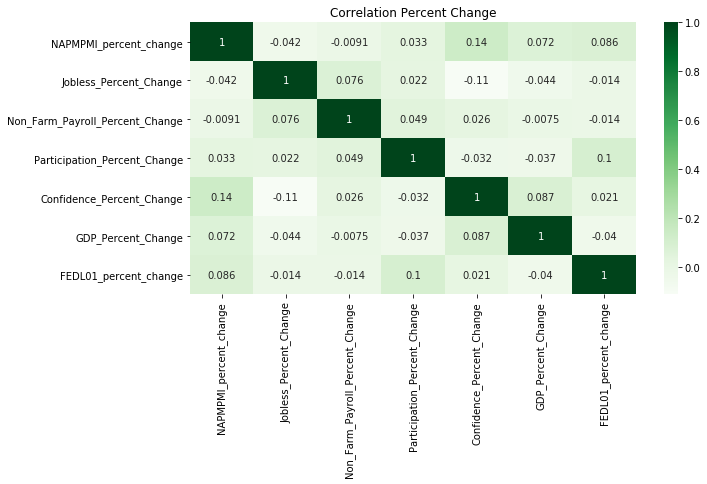

In [7]:
corrmat = df1.corr()
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="Greens")
plt.title('Correlation Percent Change')

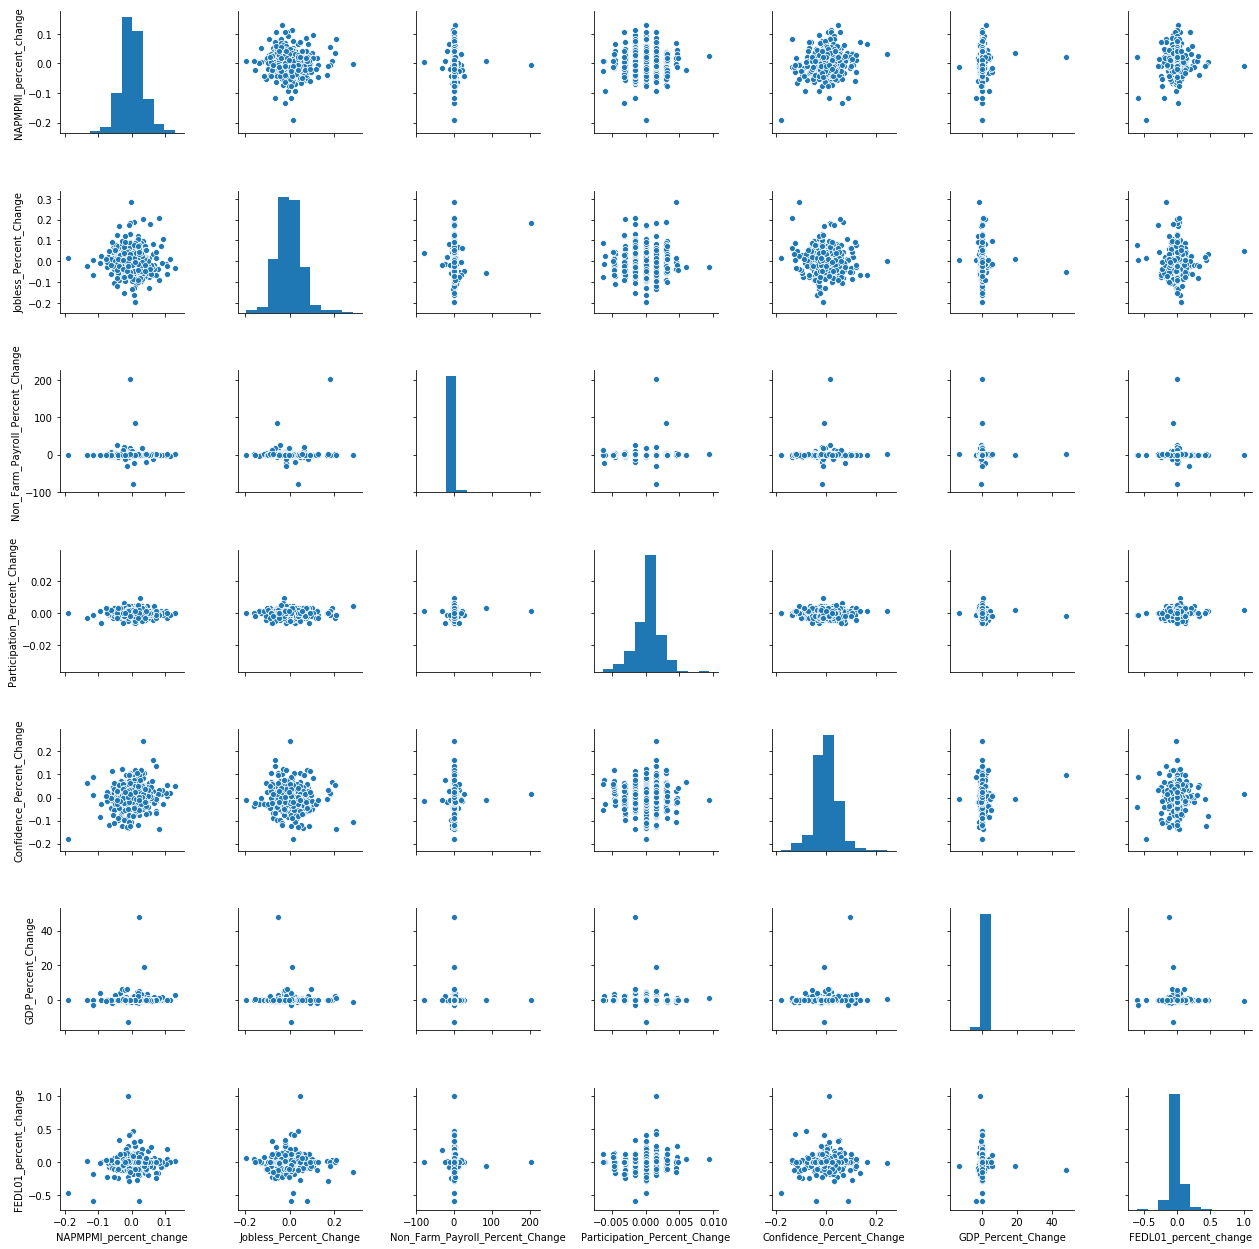

In [8]:
sns.pairplot(df1)

### Correlation raw data

Text(0.5, 1, 'Correlation Raw Data')

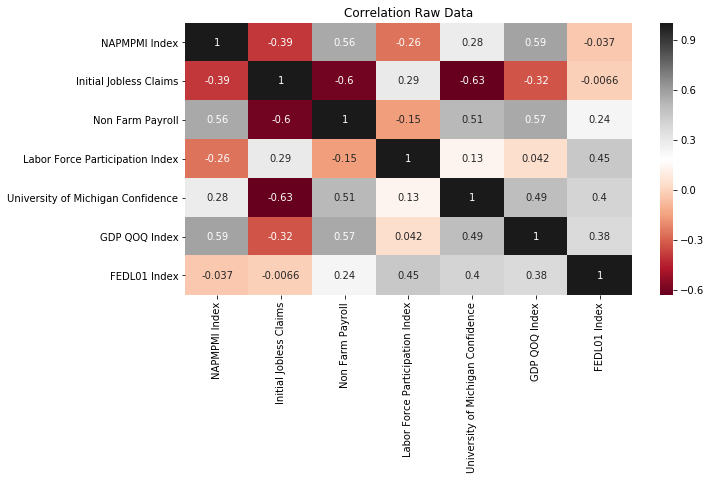

In [9]:
corrmat2 = df2.corr()
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(corrmat2,annot=True,cmap="RdGy")
plt.title('Correlation Raw Data')

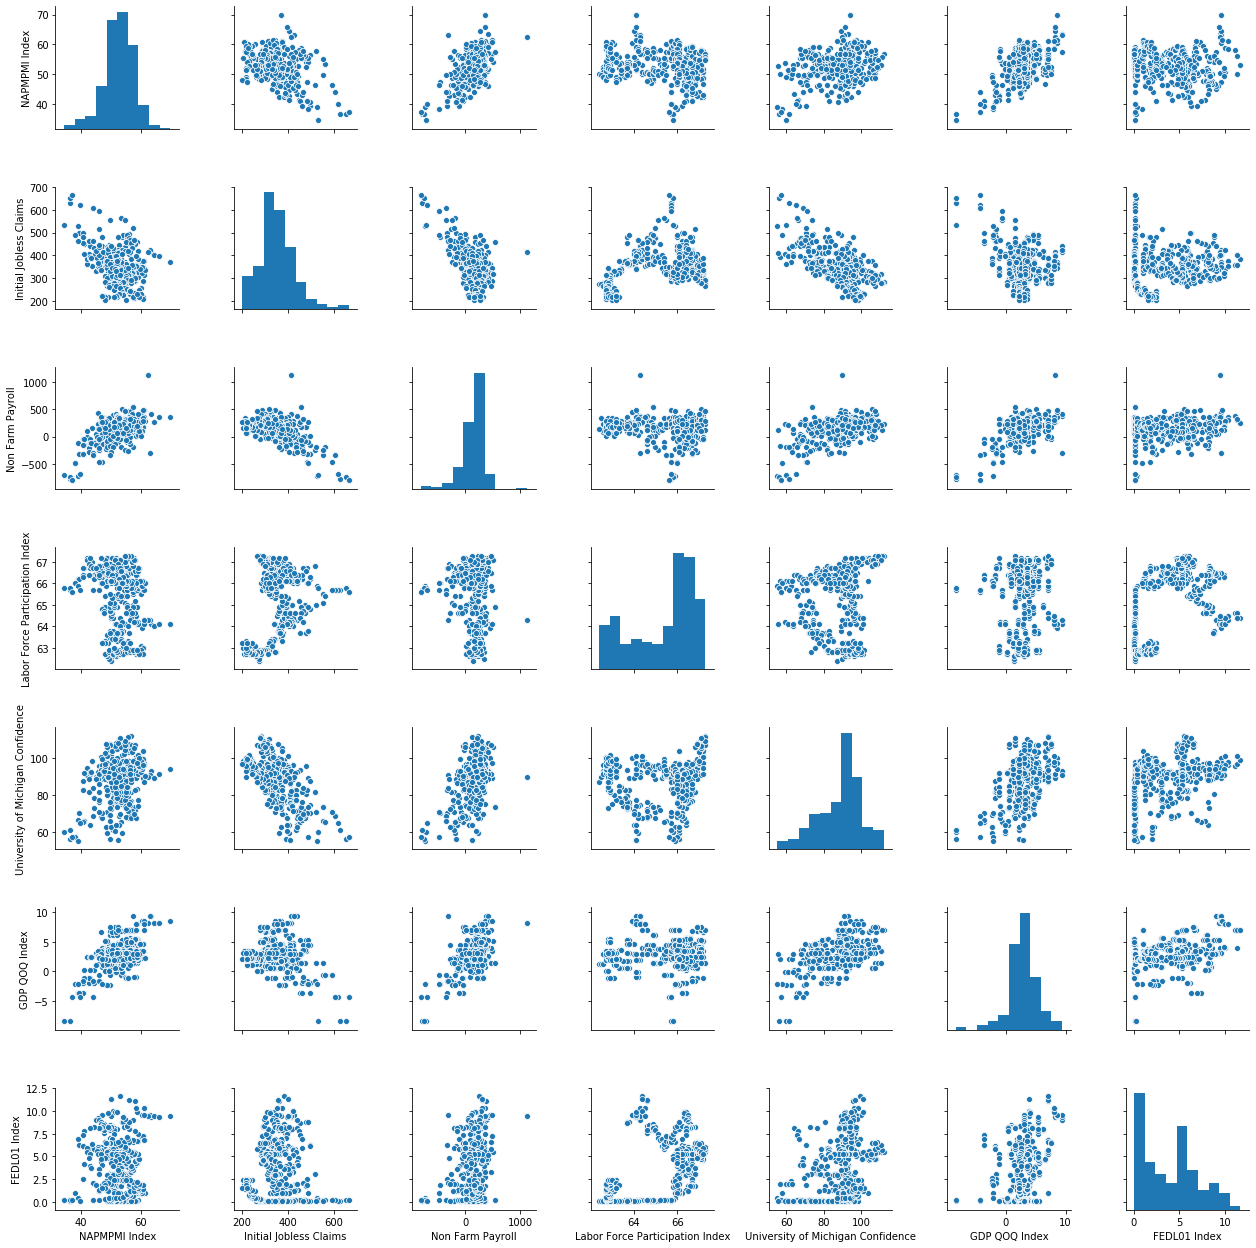

In [10]:
sns.pairplot(df2)

### Percent change line plot

In [11]:
df3 = df2.drop('Dates', axis=1)
df3.head()

,NAPMPMI Index,Initial Jobless Claims,Non Farm Payroll,Labor Force Participation Index,University of Michigan Confidence,GDP QOQ Index,FEDL01 Index
0,53.9,481,173,63.7,80.8,5.4,8.77
1,54.2,490,274,63.8,89.1,5.4,8.80
2,56.1,454,280,63.7,93.3,5.4,8.63
3,57.5,442,377,64.3,92.2,9.4,8.98
4,63.6,415,416,64.1,92.8,9.4,9.37


### Clustering Raw Data

In [12]:
X = df3
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[0.5480226 , 0.6017316 , 0.50806871, ..., 0.44973545, 0.7752809 ,
        0.75194468],
       [0.55649718, 0.62121212, 0.5606455 , ..., 0.59611993, 0.7752809 ,
        0.7545376 ],
       [0.61016949, 0.54329004, 0.56376887, ..., 0.670194  , 0.7752809 ,
        0.73984443],
       ...,
       [0.38983051, 0.03463203, 0.49921916, ..., 0.70899471, 0.58988764,
        0.15211755],
       [0.38418079, 0.        , 0.556481  , ..., 0.7319224 , 0.58988764,
        0.12791703],
       [0.35875706, 0.04112554, 0.556481  , ..., 0.77601411, 0.58988764,
        0.12791703]])

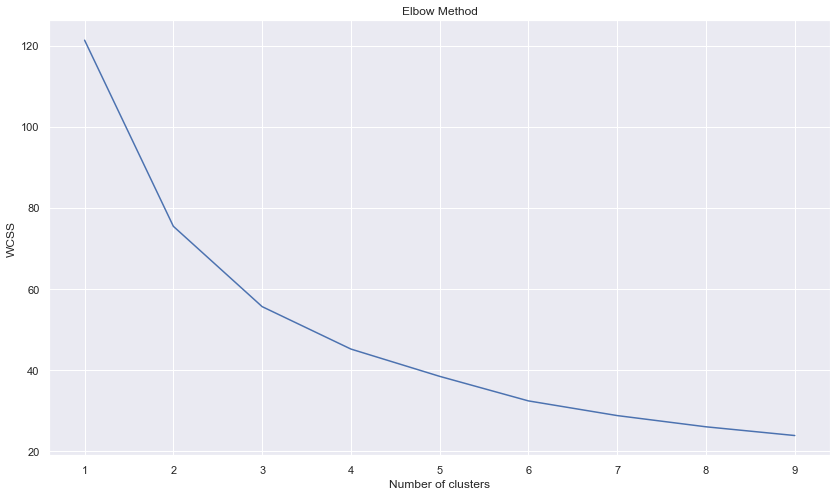

In [13]:
wcss = []
sns.set()
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(14,8))
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Clusters 3

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_scaled)
score = silhouette_score(X_scaled, pred_y, metric='euclidean', random_state = 0)
print('Silhouette:',score)

Silhouette: 0.36308429979580303


In [15]:
df2['label'] = pred_y
df2.head()

,Dates,NAPMPMI Index,Initial Jobless Claims,Non Farm Payroll,Labor Force Participation Index,University of Michigan Confidence,GDP QOQ Index,FEDL01 Index,label
0,1983-03-31,53.9,481,173,63.7,80.8,5.4,8.77,2
1,1983-04-30,54.2,490,274,63.8,89.1,5.4,8.80,2
2,1983-05-31,56.1,454,280,63.7,93.3,5.4,8.63,2
3,1983-06-30,57.5,442,377,64.3,92.2,9.4,8.98,2
4,1983-07-31,63.6,415,416,64.1,92.8,9.4,9.37,2


Text(0.5, 1.0, 'Clusters 3')

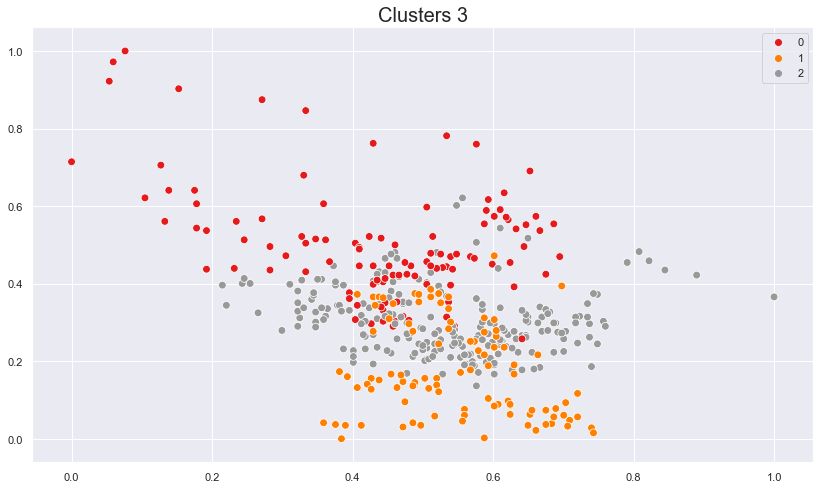

In [16]:
plt.figure(figsize=(14,8))
sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=pred_y,  s=60, palette="Set1")
plt.title('Clusters 3', fontsize = 20)

In [17]:
df2.groupby('label').agg(['max', 'min'])

Dates            NAPMPMI Index       Initial Jobless Claims       \
             max        min           max   min                    max  min   
label                                                                         
0     2011-11-30 1990-09-30          59.1  34.5                    665  322   
1     2019-12-31 2011-02-28          60.8  47.2                    421  203   
2     2007-10-31 1983-03-31          69.9  42.1                    490  266   

      Non Farm Payroll      Labor Force Participation Index        \
                   max  min                             max   min   
label                                                               
0                  534 -803                            66.9  64.0   
1                  355   15                            64.1  62.4   
2                 1118 -308                            67.3  63.7   

      University of Michigan Confidence       GDP QOQ Index      FEDL01 Index  \
                                    max   min           max  min          max   
label                                                                           
0                                  95.7  55.3           7.0 -8.4         8.20   
1                                 101.4  69.9           5.5 -1.1         2.42   
2                                 112.0  76.4           9.4 -1.1        11.64   

             
        min  
label        
0      0.07  
1      0.07  
2      0.98

### Clusters 4

In [18]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y4 = kmeans.fit_predict(X_scaled)
df2['label_4'] = pred_y4
score2 = silhouette_score(X_scaled, pred_y4, metric='euclidean', random_state = 0)
print('Silhouette:',score2)

Silhouette: 0.3340384396396332


Text(0.5, 1.0, 'Clusters 4')

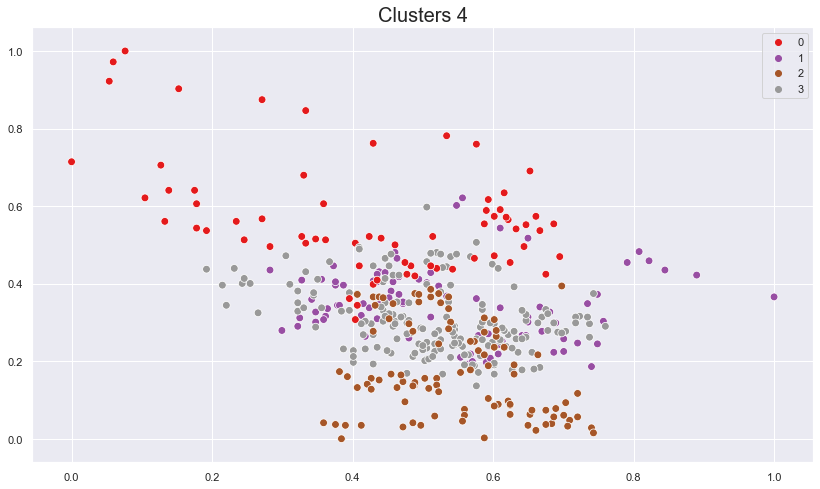

In [19]:
plt.figure(figsize=(14,8))
sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=pred_y4,  s=60, palette="Set1")
plt.title('Clusters 4', fontsize = 20)

In [20]:
df2.drop(['label', 'Dates'], axis=1).groupby('label_4').agg(['max', 'min'])

NAPMPMI Index       Initial Jobless Claims      Non Farm Payroll       \
                  max   min                    max  min              max  min   
label_4                                                                         
0                59.1  34.5                    665  345              534 -803   
1                69.9  44.5                    490  289             1118 -308   
2                60.8  47.2                    385  203              355   15   
3                61.4  41.3                    479  266              495 -286   

        Labor Force Participation Index        \
                                    max   min   
label_4                                         
0                                  66.8  64.0   
1                                  66.8  63.7   
2                                  64.1  62.4   
3                                  67.3  65.8   

        University of Michigan Confidence       GDP QOQ Index       \
                                      max   min           max  min   
label_4                                                              
0                                    87.7  55.3           4.5 -8.4   
1                                   101.0  72.8           9.4  0.3   
2                                   101.4  69.9           5.5 -1.1   
3                                   112.0  73.3           7.5 -1.1   

        FEDL01 Index        
                 max   min  
label_4                     
0               8.11  0.07  
1              11.64  5.85  
2               2.42  0.07  
3               6.54  0.98

### Clustering just GDP

In [21]:
gdp = df2[['Dates', 'GDP QOQ Index']]
gdp.head()

,Dates,GDP QOQ Index
0,1983-03-31,5.4
1,1983-04-30,5.4
2,1983-05-31,5.4
3,1983-06-30,9.4
4,1983-07-31,9.4


In [22]:
X_gdp = gdp.drop('Dates', axis =1)
sc = MinMaxScaler()
X_gdp_scaled = sc.fit_transform(X_gdp)
X_gdp_scaled[:3]

array([[0.7752809],
       [0.7752809],
       [0.7752809]])

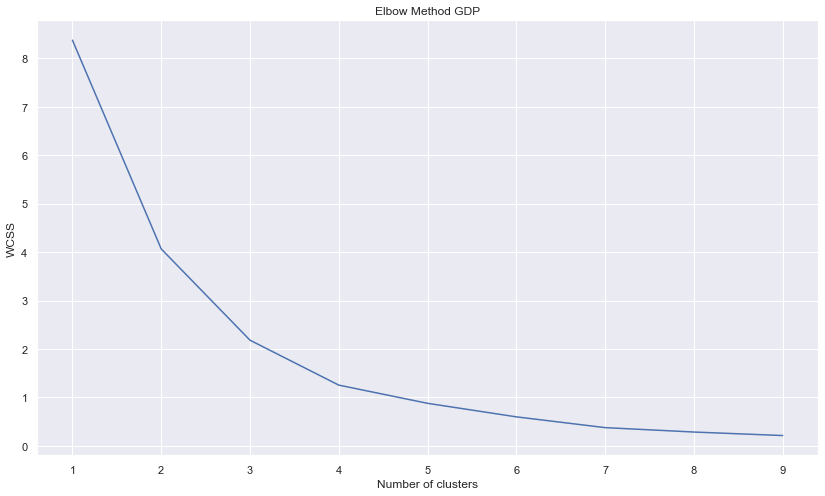

In [23]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_gdp_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(14,8))
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method GDP')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred = kmeans2.fit_predict(X_gdp_scaled)
gdp['label'] = pred
score3 = silhouette_score(X_gdp_scaled, pred, metric='euclidean', random_state = 0)
print('Silhouette:',score3)

Silhouette: 0.5619189210948711


In [25]:
#gdp.to_csv('GDP_CLUSTER.csv')

In [26]:
gdp.drop('Dates',axis=1).groupby('label').agg(['max', 'min'])

GDP QOQ Index     
                max  min
label                   
0               2.6 -0.1
1               9.4  5.3
2              -0.6 -8.4
3               5.1  2.7

In [27]:
### Fred Recessions
## 7/1/90 - 3/1/91
## 3/1/01 - 11/1/01
## 12/1/07 - 6/1/09

(array([-10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,  10. ,
         12.5]), <a list of 10 Text yticklabel objects>)

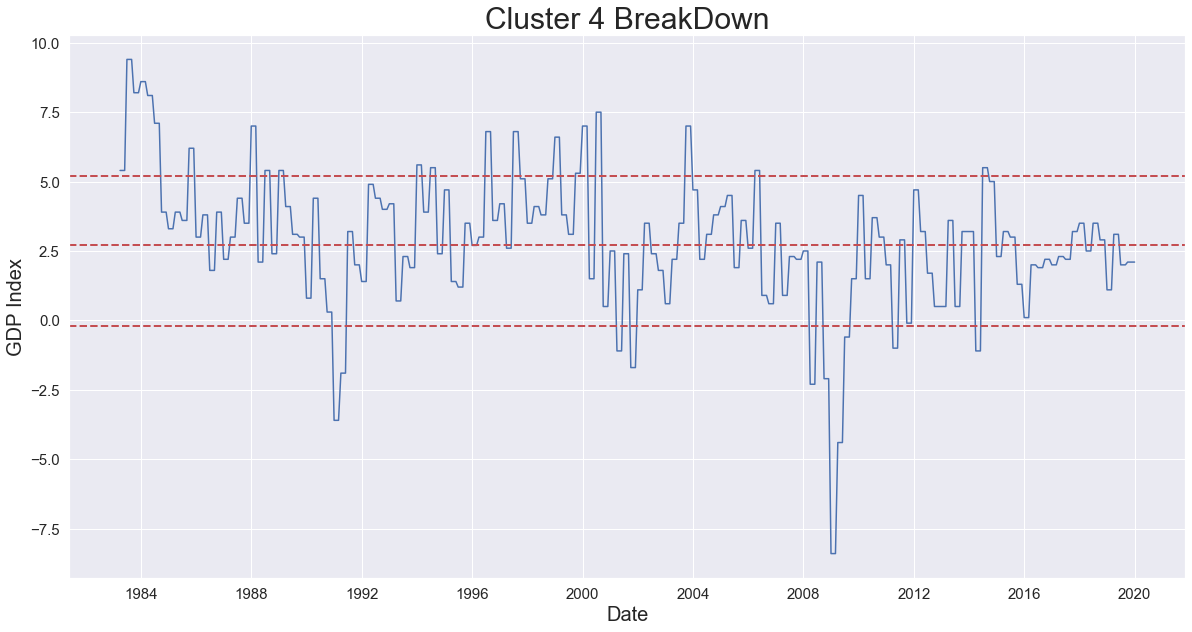

In [28]:
plt.figure(figsize = (20,10))
plt.plot(gdp['Dates'], gdp['GDP QOQ Index'])
plt.axhline(-0.2, color='r', linestyle='--',lw =2)
plt.axhline(2.7, color='r', linestyle='--',lw =2)
plt.axhline(5.2, color='r', linestyle='--',lw =2)
plt.title('Cluster 4 BreakDown', fontsize = 30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('GDP Index', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

### Cluster 3

In [29]:
kmeans2 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred3 = kmeans2.fit_predict(X_gdp_scaled)
gdp['label_3'] = pred3
score4 = silhouette_score(X_gdp_scaled, pred3, metric='euclidean', random_state = 0)
print('Silhouette:',score4)

Silhouette: 0.5575906334342361


In [30]:
gdp.drop(['Dates', 'label'], axis = 1).groupby('label_3').agg(['max', 'min'])

GDP QOQ Index     
                  max  min
label_3                   
0                 4.2  0.3
1                 9.4  4.4
2                 0.1 -8.4

(array([-10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,  10. ,
         12.5]), <a list of 10 Text yticklabel objects>)

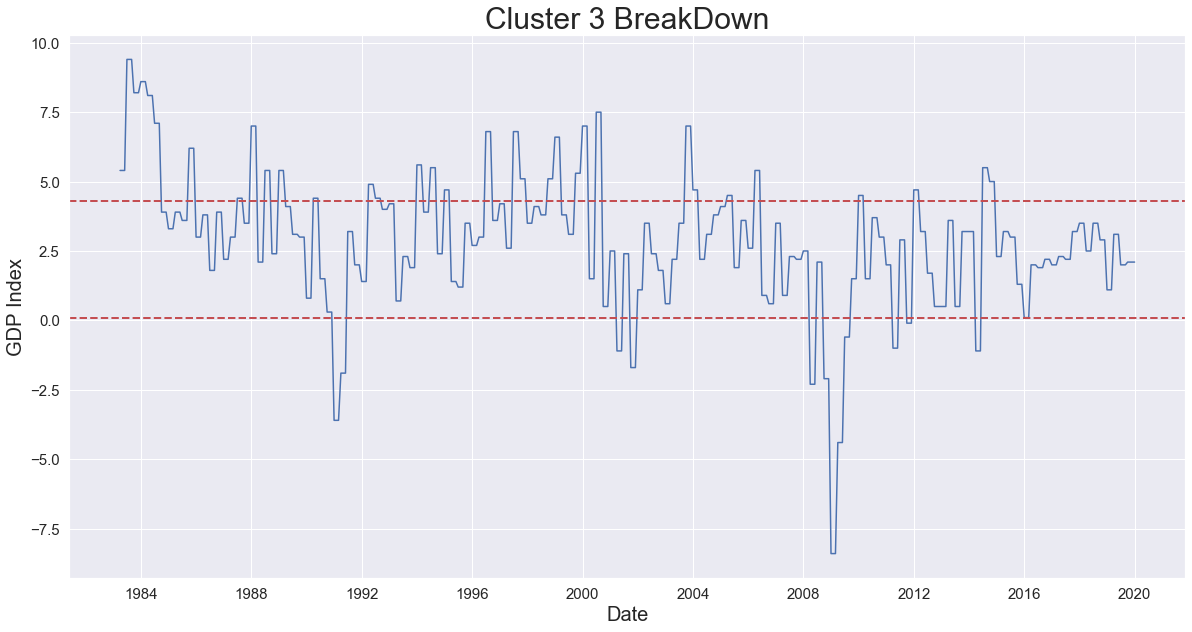

In [31]:
plt.figure(figsize = (20,10))
plt.plot(gdp['Dates'], gdp['GDP QOQ Index'])
plt.axhline(0.1, color='r', linestyle='--',lw =2)
plt.axhline(4.3, color='r', linestyle='--',lw =2)
plt.title('Cluster 3 BreakDown', fontsize = 30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('GDP Index', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

### Cluster 5

In [32]:
kmeans5 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred5 = kmeans5.fit_predict(X_gdp_scaled)
gdp['label_5'] = pred5
score5 = silhouette_score(X_gdp_scaled, pred5, metric='euclidean', random_state = 0)
print('Silhouette:',score5)

Silhouette: 0.5416572129232152


In [33]:
gdp.drop(['Dates', 'label', 'label_3'], axis = 1).groupby('label_5').agg(['max', 'min'])

GDP QOQ Index     
                  max  min
label_5                   
0                 3.3  1.1
1                 9.4  6.2
2                -3.6 -8.4
3                 5.6  3.5
4                 0.9 -2.3

(array([-10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,  10. ,
         12.5]), <a list of 10 Text yticklabel objects>)

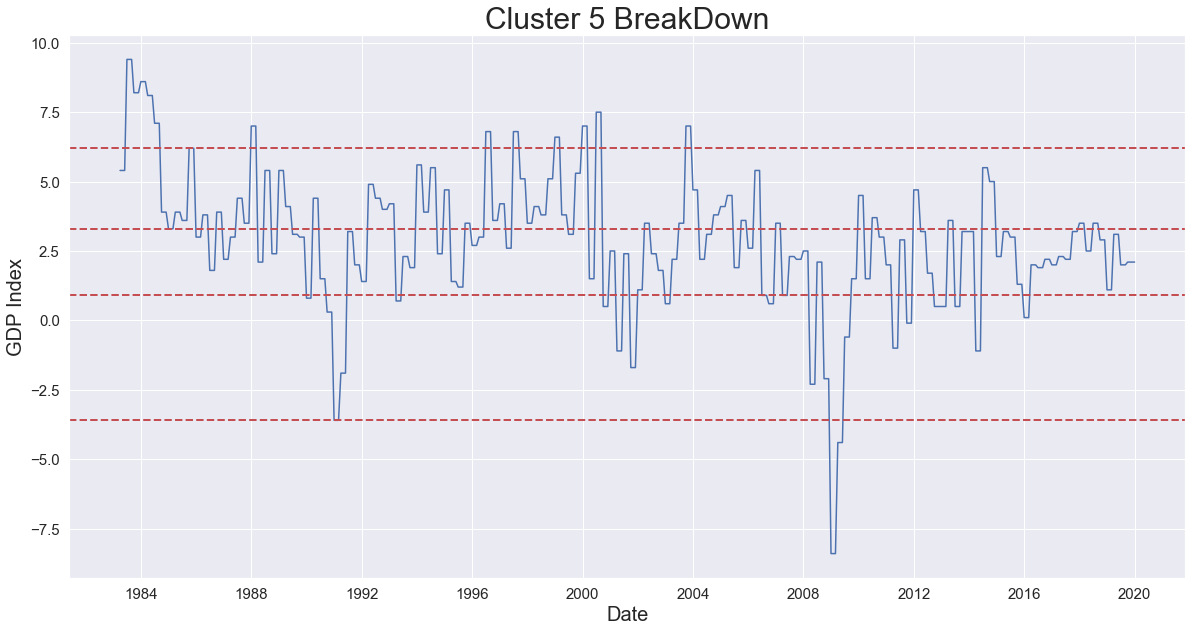

In [34]:
plt.figure(figsize = (20,10))
plt.plot(gdp['Dates'], gdp['GDP QOQ Index'])
plt.axhline(-3.6, color='r', linestyle='--',lw =2)
plt.axhline(0.9, color='r', linestyle='--',lw =2)
plt.axhline(3.3, color='r', linestyle='--',lw =2)
plt.axhline(6.2, color='r', linestyle='--',lw =2)
plt.title('Cluster 5 BreakDown', fontsize = 30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('GDP Index', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

### Percent Change Clustering 

In [35]:
X2 = df1.drop('Dates', axis = 1)
sc2 = MinMaxScaler()
X_scaled2 = sc2.fit_transform(X2)
X_scaled2

array([[0.61132284, 0.44375717, 0.27866601, ..., 0.66459142, 0.21311475,
        0.37633428],
       [0.7031861 , 0.25197474, 0.2766734 , ..., 0.5342311 , 0.21311475,
        0.36210411],
       [0.67172367, 0.34983717, 0.27782421, ..., 0.39603001, 0.22525804,
        0.39957388],
       ...,
       [0.62656944, 0.3953718 , 0.27591592, ..., 0.48155683, 0.21311475,
        0.3097723 ],
       [0.58108547, 0.2528278 , 0.2790962 , ..., 0.45560531, 0.21311475,
        0.27844174],
       [0.53569747, 0.59955639, 0.27659574, ..., 0.48424997, 0.21311475,
        0.37419355]])

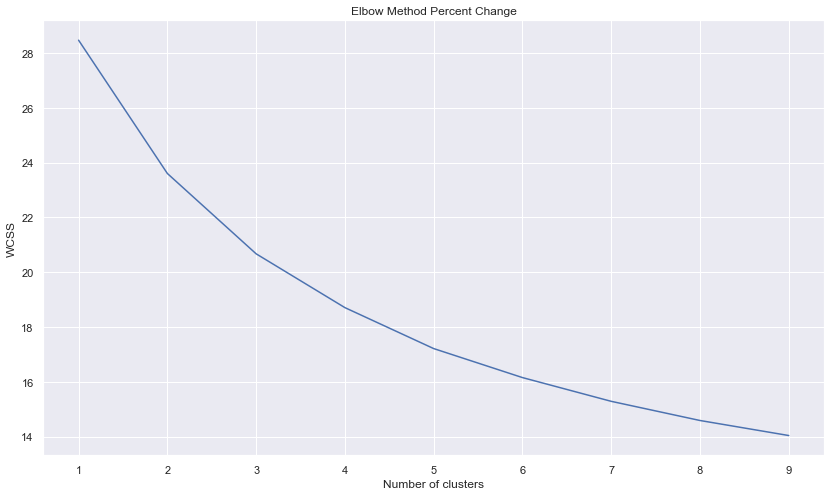

In [36]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(X_scaled2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(14,8))
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method Percent Change')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_3 = kmeans.fit_predict(X_scaled2)
df1['label_3'] = pred_3
score = silhouette_score(X_scaled2, pred_3, metric='euclidean', random_state = 0)
print('Silhouette:',score)

Silhouette: 0.1606117699569144


Text(0.5, 1.0, 'Clusters 3')

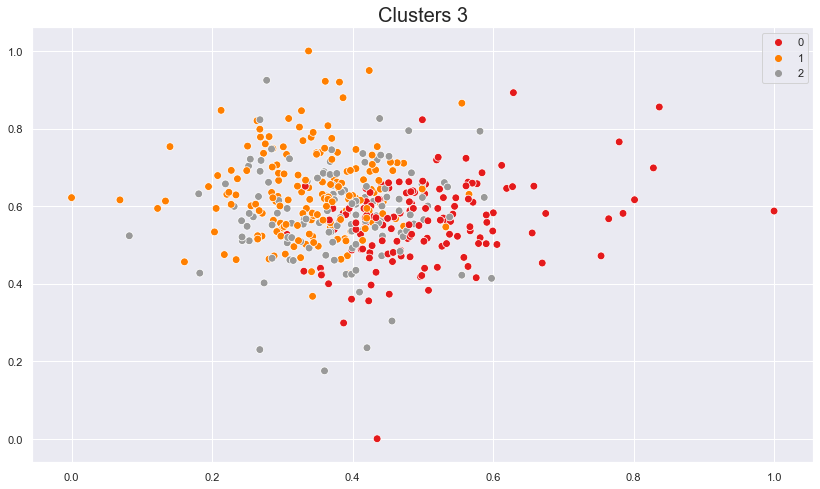

In [38]:
plt.figure(figsize=(14,8))
sns.scatterplot(X_scaled2[:,1], X_scaled2[:,0], hue=pred_3,  s=60, palette="Set1")
plt.title('Clusters 3', fontsize = 20)

In [39]:
df1.drop('Dates', axis = 1).groupby('label_3').agg(['max', 'min'])

NAPMPMI_percent_change           Jobless_Percent_Change            \
                           max       min                    max       min   
label_3                                                                     
0                     0.095833 -0.190678               0.286070 -0.047170   
1                     0.130337 -0.072761               0.077364 -0.194581   
2                     0.106087 -0.134478               0.092760 -0.155063   

        Non_Farm_Payroll_Percent_Change             \
                                    max        min   
label_3                                              
0                                204.00 -78.000000   
1                                 85.20 -31.666667   
2                                 25.75 -23.416667   

        Participation_Percent_Change           Confidence_Percent_Change  \
                                 max       min                       max   
label_3                                                                    
0                           0.004539 -0.003180                  0.085106   
1                           0.009419 -0.001560                  0.245739   
2                          -0.001488 -0.006339                  0.118721   

                  GDP_Percent_Change        FEDL01_percent_change            
              min                max    min                   max       min  
label_3                                                                      
0       -0.180654                6.2 -13.00              1.000000 -0.597938  
1       -0.067275               48.0  -1.44              0.317073 -0.266667  
2       -0.099281                6.0  -3.00              0.333333 -0.589744

### Cluster 4

In [40]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_4 = kmeans.fit_predict(X_scaled2)
df1['label_4'] = pred_4
score = silhouette_score(X_scaled2, pred_4, metric='euclidean', random_state = 0)
print('Silhouette:',score)

Silhouette: 0.16938973269613636


Text(0.5, 1.0, 'Clusters 4')

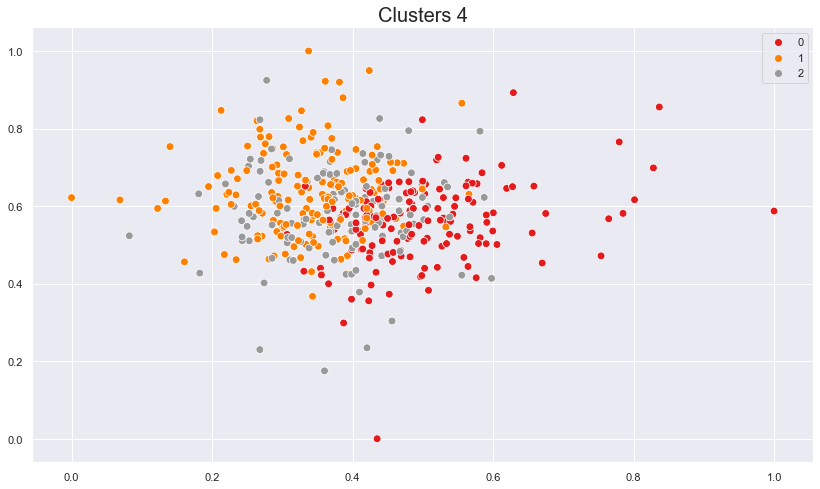

In [41]:
plt.figure(figsize=(14,8))
sns.scatterplot( X_scaled2[:,1], X_scaled2[:,0], hue=pred_3,  s=60, palette="Set1")
plt.title('Clusters 4', fontsize = 20)

### gdp  index percent change 

In [42]:
gdp2 = df1[['Dates', 'GDP_Percent_Change']]
X_gdp2 = gdp2.drop('Dates', axis =1)
sc2 = MinMaxScaler()
X_gdp_scaled2 = sc.fit_transform(X_gdp2)
X_gdp_scaled2[:3]

array([[0.21311475],
       [0.21311475],
       [0.22525804]])

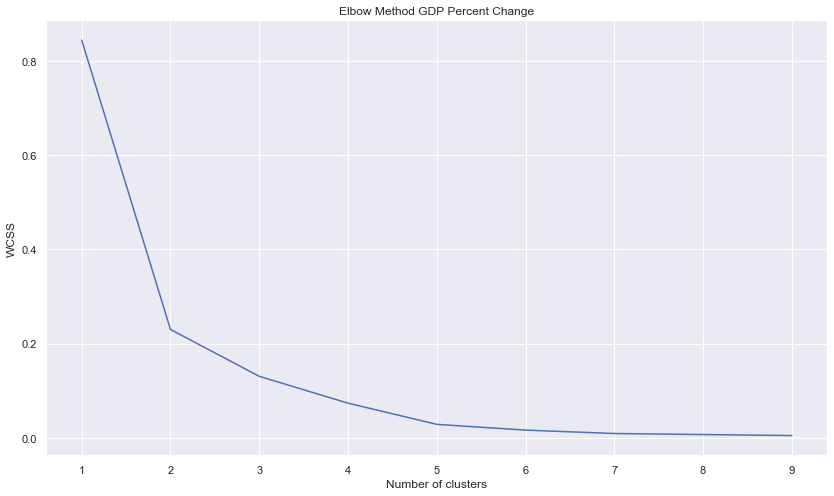

In [43]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(X_gdp_scaled2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(14,8))
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method GDP Percent Change')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
pred_3 = kmeans.fit_predict(X_gdp_scaled2)
gdp2['label_3'] = pred_3
score = silhouette_score(X_gdp_scaled2, pred_3, metric='euclidean', random_state = 0)
print('Silhouette:',score)

Silhouette: 0.9072572555284267


In [45]:
gdp2.drop('Dates', axis = 1).groupby('label_3').agg(['max', 'min'])

GDP_Percent_Change           
                       max        min
label_3                              
0                 2.684211 -13.000000
1                48.000000  48.000000
2                19.000000   3.181818

(array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 9 Text yticklabel objects>)

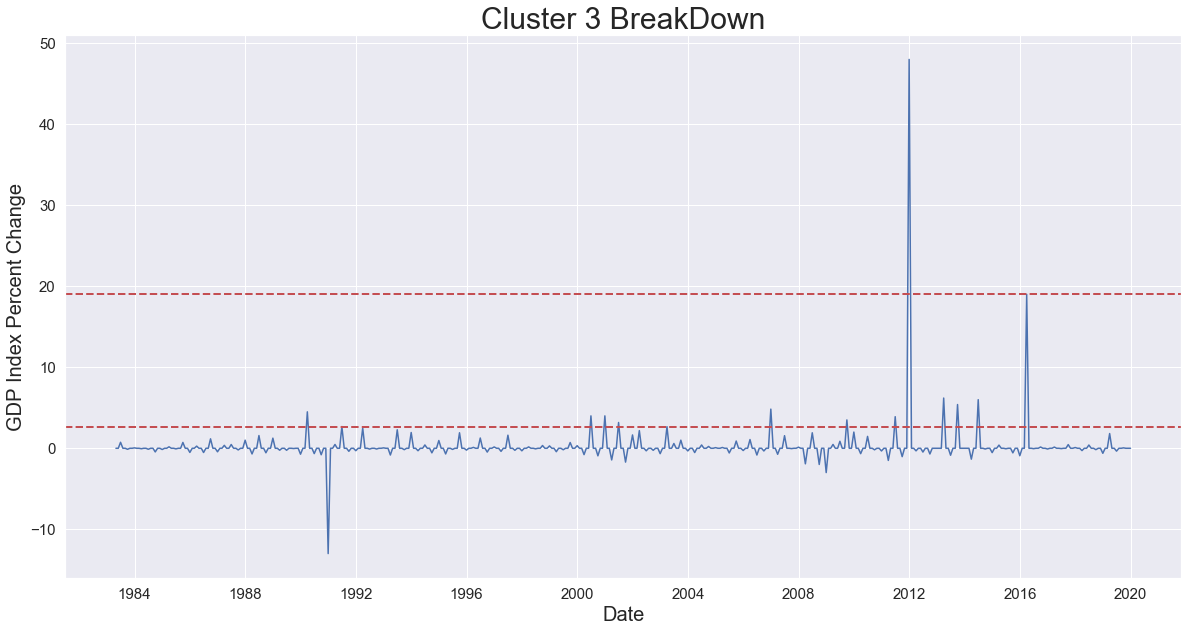

In [46]:
plt.figure(figsize = (20,10))
plt.plot(gdp2['Dates'], gdp2['GDP_Percent_Change'])
plt.axhline(2.6, color='r', linestyle='--',lw =2)
plt.axhline(19, color='r', linestyle='--',lw =2)
plt.title('Cluster 3 BreakDown', fontsize = 30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('GDP Index Percent Change', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

### Cluster 4

In [47]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=10, random_state=0)
pred_4 = kmeans.fit_predict(X_gdp_scaled2)
gdp2['label_4'] = pred_4
score = silhouette_score(X_gdp_scaled2, pred_4, metric='euclidean', random_state = 0)
print('Silhouette:',score)

Silhouette: 0.8701690446029309


In [48]:
gdp2.drop(['Dates','label_3'], axis = 1).groupby('label_4').agg(['max', 'min'])

GDP_Percent_Change           
                       max        min
label_4                              
0                 6.200000   1.466667
1                 1.266667 -13.000000
2                48.000000  48.000000
3                19.000000  19.000000

(array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 9 Text yticklabel objects>)

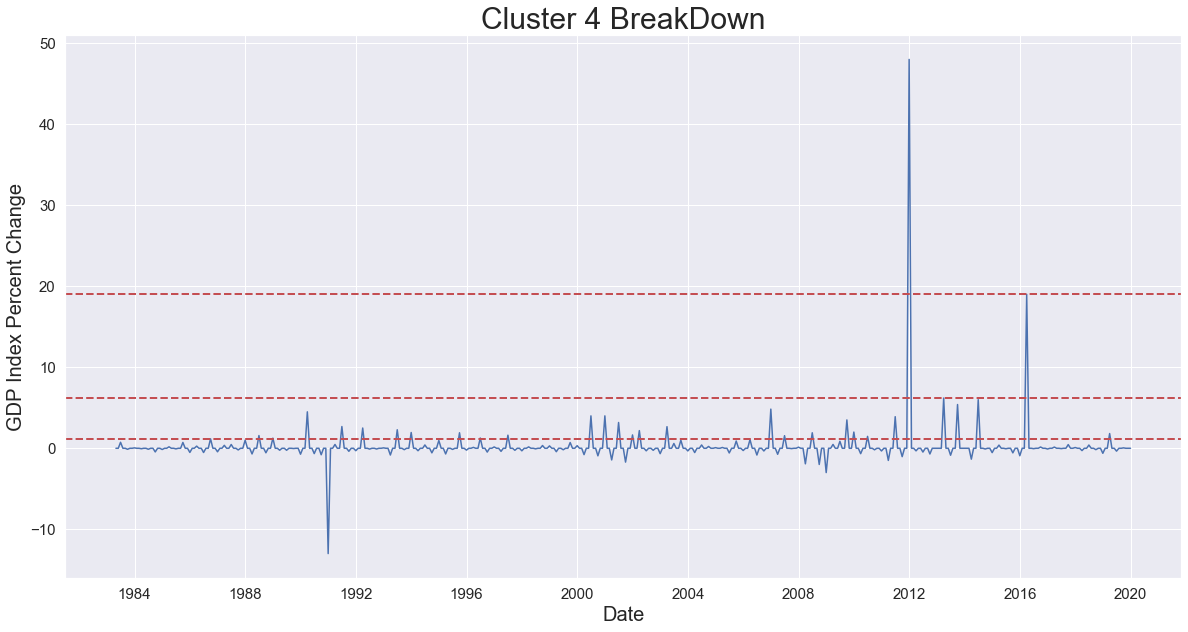

In [49]:
plt.figure(figsize = (20,10))
plt.plot(gdp2['Dates'], gdp2['GDP_Percent_Change'])
plt.axhline(1.2, color='r', linestyle='--',lw =2)
plt.axhline(6.2, color='r', linestyle='--',lw =2)
plt.axhline(19, color='r', linestyle='--',lw =2)
plt.title('Cluster 4 BreakDown', fontsize = 30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('GDP Index Percent Change', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)